In [4]:
import pandas as pd
import numpy as np
import time, datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
input1 = pd.read_csv("~/Downloads/ign.csv")

In [6]:
print ("The original length of the dataset is = %d"%len(input1))

The original length of the dataset is = 18625


In [7]:
#Check for NAN, null values
input2 = input1.dropna(how = 'any')
print ("The length of dataset with clean values is = %d"%len(input1))
l1 = len(input1)
l2 = len(input2)
print ("Number of values discard = %d"%(l1-l2))

The length of dataset with clean values is = 18625
Number of values discard = 36


In [8]:
#Percentage of information loss due to discarding of rows
print ("Percentage of data loss = %f"%((l1-l2)/l1*100))

Percentage of data loss = 0.193289


In [9]:
#As the percentage is very samll (<1), we can safely discard those rows, and use rest of the data for analysis.

In [10]:
# Analysis the constituents of the datset

In [11]:
#What are the first and last few values
input2.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [12]:
input2.tail()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
18620,18620,Good,Tokyo Mirage Sessions #FE,/games/fire-emblem-x-shin-megami-tensei/wii-u-...,Wii U,7.6,RPG,N,2016,6,29
18621,18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28
18623,18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28
18624,18624,Masterpiece,Inside,/games/inside-playdead/pc-20055740,PC,10.0,Adventure,Y,2016,6,28


In [13]:
input2.columns

Index(['Unnamed: 0', 'score_phrase', 'title', 'url', 'platform', 'score',
       'genre', 'editors_choice', 'release_year', 'release_month',
       'release_day'],
      dtype='object')

In [14]:
input2.describe()

,Unnamed: 0,score,release_year,release_month,release_day
count,18589.000000,18589.000000,18589.000000,18589.000000,18589.000000
mean,9306.310183,6.950853,2006.508634,7.139868,15.601431
std,5376.141895,1.712078,4.588687,3.477048,8.692460
min,0.000000,0.500000,1970.000000,1.000000,1.000000
25%,4651.000000,6.000000,2003.000000,4.000000,8.000000
50%,9298.000000,7.300000,2007.000000,8.000000,16.000000
75%,13959.000000,8.200000,2010.000000,10.000000,23.000000
max,18624.000000,10.000000,2016.000000,12.000000,31.000000


In [15]:
#It means that only 5 columns have numerical values, rest are categorical/object type

In [16]:
#lets see the high correlation if any among these numerical values

In [17]:
input2.corr()>0.7

,Unnamed: 0,score,release_year,release_month,release_day
Unnamed: 0,True,False,True,False,False
score,False,True,False,False,False
release_year,True,False,True,False,False
release_month,False,False,False,True,False
release_day,False,False,False,False,True


In [18]:
#Except for the correlation of elements with itself, there is no high correlation between other variables.

In [19]:
# To find the number of unique values in categorical variable
def find_unique(col_name):
    l=input2[col_name].unique()
    return len(l)

In [20]:
col_list=['score_phrase','title','url','platform','genre','editors_choice']
for name in col_list:
    print (name+"        has unique type count = %d"%find_unique(name))

score_phrase        has unique type count = 11
title        has unique type count = 12556
url        has unique type count = 18541
platform        has unique type count = 59
genre        has unique type count = 112
editors_choice        has unique type count = 2


In [21]:
#Lets see what score phrase has

In [22]:
sp = input2['score_phrase'].unique()

In [23]:
sp

array(['Amazing', 'Great', 'Good', 'Awful', 'Okay', 'Mediocre', 'Bad',
       'Painful', 'Unbearable', 'Disaster', 'Masterpiece'], dtype=object)

In [24]:
input2.groupby('score_phrase').count()

,Unnamed: 0,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
score_phrase,,,,,,,,,,
Amazing,1803,1803,1803,1803,1803,1803,1803,1803,1803,1803
Awful,662,662,662,662,662,662,662,662,662,662
Bad,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268
Disaster,3,3,3,3,3,3,3,3,3,3
Good,4725,4725,4725,4725,4725,4725,4725,4725,4725,4725
Great,4765,4765,4765,4765,4765,4765,4765,4765,4765,4765
Masterpiece,55,55,55,55,55,55,55,55,55,55
Mediocre,1957,1957,1957,1957,1957,1957,1957,1957,1957,1957
Okay,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940


In [25]:
#Mediocre and okay look confusing, we can merge them for ease of understand
def merge_one(x):
    if x=='Mediocre' or x=='Okay':
        return 'Mediocre_Okay'
    else:
        return x

In [26]:
input2['score_phrase_new'] = input2['score_phrase'].apply(merge_one)

/usr/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
# Now lets convert the categorical values to score-points
def score_to_numeric(x):
    if x=='Masterpiece':
        return 10
    elif x=='Amazing':
        return 9
    elif x=='Great':
        return 8
    elif x=='Good':
        return 7
    elif x=='Mediocre_Okay':
        return 6
    elif x=='Bad':
        return 5
    elif x=='Awful':
        return 4
    elif x=='Painful':
        return 3
    elif x=='Unbearable':
        return 2
    elif x=='Disaster':
        return 1

In [28]:
input2['category_score'] = input2['score_phrase_new'].apply(score_to_numeric).astype(int)

/usr/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
#Lets see the dataset now
input2.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,score_phrase_new,category_score
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12,Amazing,9
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12,Amazing,9
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12,Great,8
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11,Great,8
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11,Great,8


In [30]:
input2.corr()

,Unnamed: 0,score,release_year,release_month,release_day,category_score
Unnamed: 0,1.000000,0.035783,0.894141,-0.096073,0.009382,0.034243
score,0.035783,1.000000,0.062952,0.007765,0.020410,0.965110
release_year,0.894141,0.062952,1.000000,-0.115194,0.016472,0.059000
release_month,-0.096073,0.007765,-0.115194,1.000000,-0.067407,0.008425
release_day,0.009382,0.020410,0.016472,-0.067407,1.000000,0.019864
category_score,0.034243,0.965110,0.059000,0.008425,0.019864,1.000000


In [31]:
# Score and categorical value of score seems to have a hight correlation, hence we can discard one of them in our analysis.
# Since the categorical values were assigned by us, it will be better to use score values which are precomputed for us

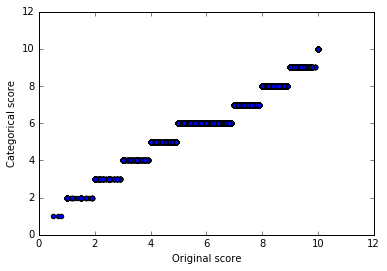

In [32]:
plt.scatter(input2['score'],input2['category_score'])
plt.xlabel("Original score")
plt.ylabel("Categorical score")

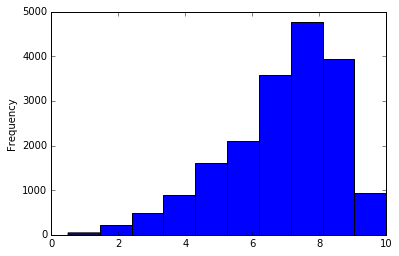

In [33]:
input2['score'].plot(kind='hist')

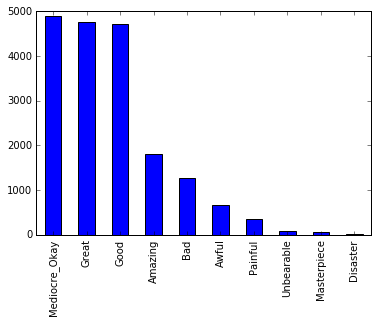

In [34]:
input2['score_phrase_new'].value_counts().plot(kind='bar')

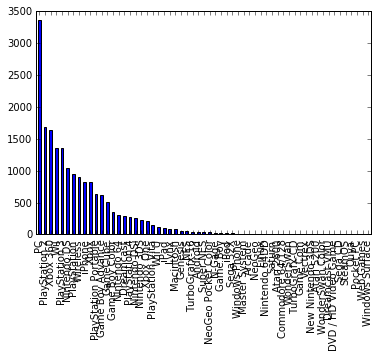

In [35]:
input2['platform'].value_counts().plot(kind='bar')

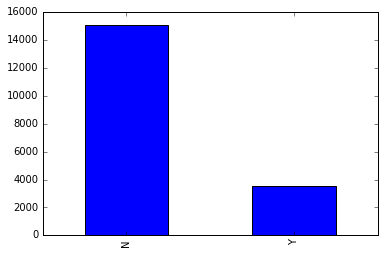

In [36]:
input2['editors_choice'].value_counts().plot(kind='bar')

In [37]:
# The number of Y is relatively low as compared to No, we might not have a balanced dataset to deal with.

In [38]:
#lets convert the values to 0-1 for editors choice, 1 means awarded, 0 otherwise

In [39]:
def editor_choice_val(x):
    if x=='Y':
        return 1
    else:
        return 0
    

In [40]:
input2['editor_award']=input2['editors_choice'].apply(editor_choice_val)

/usr/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
input2.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,score_phrase_new,category_score,editor_award
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12,Amazing,9,1
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12,Amazing,9,1
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12,Great,8,0
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11,Great,8,0
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11,Great,8,0


In [42]:
###################
''' Now lets try to answer some basic questions'''

' Now lets try to answer some basic questions'

In [43]:
# Q1 Analyze and list the platforms with the most "Editor's Choice" awards?

In [44]:
#first lets find out the distribution for each platform
d1 = input2.groupby('platform').editor_award.count()

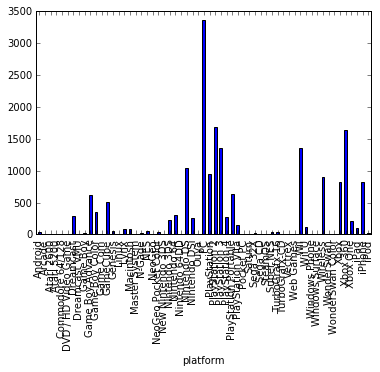

In [45]:
d1.plot(kind='bar')

In [46]:
# Looks like some platforms are more popular that rest, lets find out

In [47]:
#Picking only the top 10 value
d1 = d1.sort_values(ascending=False)[0:10]

In [48]:
d1

platform
PC               3367
PlayStation 2    1684
Xbox 360         1631
Wii              1362
PlayStation 3    1355
Nintendo DS      1044
PlayStation       952
Wireless          906
iPhone            828
Xbox              821
Name: editor_award, dtype: int64

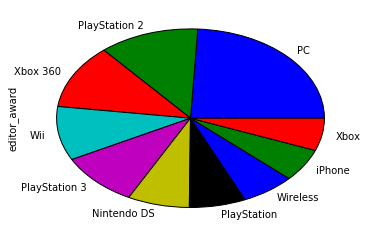

In [49]:
d1.plot("pie")

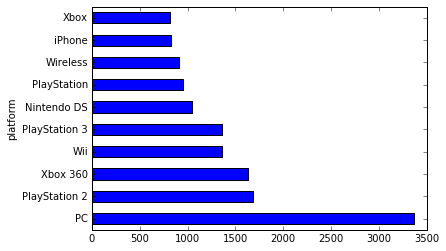

In [50]:
d1.plot(kind='barh')

In [51]:
#Clearly PC is the most prefered platform, with the second and 3rd rankers almost 50% below the first

In [52]:
###Lets answer another question
#Does number of games by a platform in a given year have any effect on these awards?

In [53]:
d2 = input2.groupby(['platform','release_year']).editor_award.sum()

In [54]:
d2

platform             release_year
Android              2010             1
                     2011             1
                     2012             1
                     2013             0
                     2014             1
                     2015             0
                     2016             0
Arcade               2000             0
                     2008             0
                     2009             1
                     2012             0
Atari 2600           2008             0
Atari 5200           2008             0
Commodore 64/128     2008             0
                     2009             0
DVD / HD Video Game  2002             0
Dreamcast            1999             5
                     2000            29
                     2001            23
                     2002             2
                     2006             0
Dreamcast VMU        1999             0
Game Boy             1999             2
                     2000             0
      

In [55]:
# Again lets pick the 10 ten values
d2 = d2.sort_values(axis=0,ascending=False)[0:10]

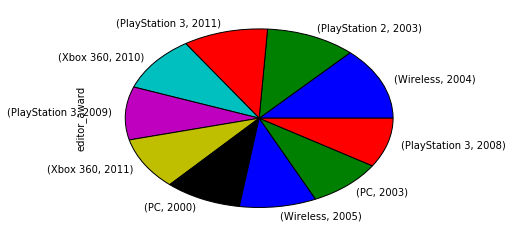

In [56]:
d2.plot(kind='pie')

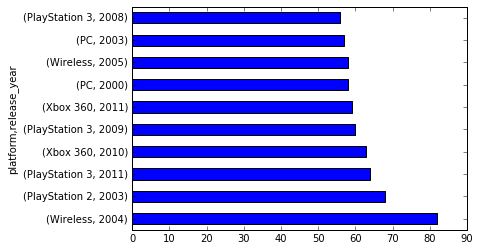

In [57]:
d2.plot(kind='barh')

In [58]:
# Looks like the year in which a particular platform was released, affects the award it receives in that year. 
#initially we saw tha PC has the highest awards overall, but the release of Wireless in 2004 surpassed the scores
# of both PC releases in 2003 and 2000

In [59]:
##Time for another question

In [60]:
#What is Macintosh's average award count?

In [61]:
awards_mac = input2[input2['platform']=='Macintosh']['editor_award'].sum()

In [62]:
total_mac = input2[input2['platform']=='Macintosh']['editor_award'].count()

In [63]:
print ("Total MAC games released = %d"%total_mac)
print ("MAC games with awards = %d"%awards_mac)

Total MAC games released = 81
MAC games with awards = 40


In [64]:
#The on an average the number of MAC awards = MAC games which received awards/Total MAC games release
print ("On average MAC games are awarded %f percent of the time."%(awards_mac/total_mac*100))

On average MAC games are awarded 49.382716 percent of the time.


In [65]:
#Also 
input2[input2['platform']=='Macintosh'].groupby(['platform','release_year']).editor_award.sum()

platform   release_year
Macintosh  2002            20
           2003             2
           2012             7
           2013             7
           2014             3
           2015             0
           2016             1
Name: editor_award, dtype: int64

In [66]:
Avg_mac=(20+2+7+7+3+0+1)/7

In [67]:
print ("The average awards for MAC over the years = %f"%Avg_mac)

The average awards for MAC over the years = 5.714286


In [68]:
print ("The average awards for MAC between years 2013-2016 = %f"%((7+7+3+0+1)/5))

The average awards for MAC between years 2013-2016 = 3.600000


In [69]:
# Looks like MAC popularilty among editor's is decreasing

In [70]:
#### Time for another question

In [71]:
#What is the optimal month for releasing a game? 

In [72]:
d4=input2.groupby('release_month').editor_award.sum()
d4.sort_values(axis=0,ascending=False)[0:13]

release_month
11    514
10    472
9     406
3     349
2     288
8     270
6     251
4     214
12    193
5     192
7     186
1     180
Name: editor_award, dtype: int64

In [73]:
# Looks like maximum awards are given in the month of Noverber, but is it the most optimal month?
# We don't know yet

In [74]:
d42=input2.groupby('release_month').editor_award.count()
d42.sort_values(axis=0,ascending=False)[0:13]

release_month
11    2655
10    2306
9     1701
3     1565
12    1504
6     1481
8     1334
2     1327
4     1262
7     1188
5     1141
1     1125
Name: editor_award, dtype: int64

In [75]:
# Hmm maximum releases also happen in November. 
# lets see how optimal these months actually are

In [76]:
d43=d4/d42*100

In [77]:
d43.sort_values(axis=0,ascending=False)[0:13]

release_month
9     23.868313
3     22.300319
2     21.703090
10    20.468343
8     20.239880
11    19.359699
4     16.957211
6     16.948008
5     16.827344
1     16.000000
7     15.656566
12    12.832447
Name: editor_award, dtype: float64

In [78]:
# Okay, now that is very different story. Our supposedly favourite month seems to have slipped down
# Let me explain what happended
# Even though November has the maximum awards and release, but the ratio of awards/releases is low for it.
# Which means that even though a high number of games get released, the propotional number do not get awarded.
# Hence if you want to have maximum ROI, then release October

In [79]:
## lets answer another question
#Analyze the percentage growth in the gaming industry over the years.

In [80]:
d5=input2.groupby('release_year').editor_award.count()

In [81]:
d5

release_year
1970       1
1996     149
1997     205
1998     339
1999     775
2000    1045
2001     688
2002     936
2003     969
2004     997
2005    1088
2006    1208
2007    1606
2008    1909
2009    1683
2010    1356
2011    1065
2012     749
2013     695
2014     535
2015     365
2016     226
Name: editor_award, dtype: int64

In [82]:
#this function will calculate the % growth between 2 successive years
def get_per(prev,newyr):
    gp=(newyr-prev)/prev*100
    return gp


In [83]:
d5_year_list=[]
d5_growth_per_list=[]

In [84]:
for i in d5.iteritems():
    if i[0]==1970:
        val=0
    else:
        val=get_per(prev,i[1])
    d5_year_list.append(i[0])
    d5_growth_per_list.append(val)
    prev=i[1]

In [85]:
len(d5_growth_per_list)

22

In [86]:
len(d5_year_list)

22

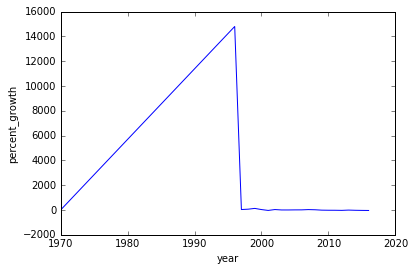

In [87]:
# lets visualize these values
plt.plot(d5_year_list,d5_growth_per_list)
plt.xlabel("year")
plt.ylabel("percent_growth")

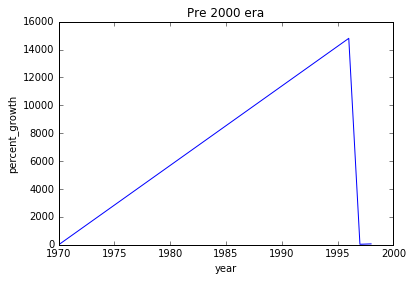

In [88]:
# This does not give us a good picture, let plot the pre and post 2000 era separtely
plt.plot(d5_year_list[:4],d5_growth_per_list[:4])
plt.xlabel("year")
plt.ylabel("percent_growth")
plt.title("Pre 2000 era")

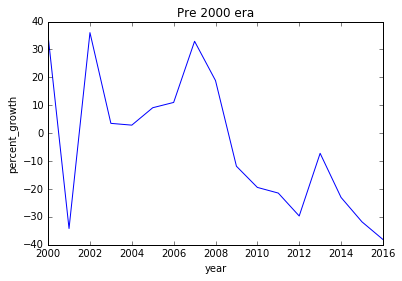

In [89]:
plt.plot(d5_year_list[5:],d5_growth_per_list[5:])
plt.xlabel("year")
plt.ylabel("percent_growth")
plt.title("Pre 2000 era")

In [90]:
# This looks more interesting
# One thing is clear that the gaming industry does not see monotic success or failure.
# Maybe the peaks and vally can be explained by the release, or downfall of some popular tehcnology of that era

In [91]:
## PREDICTION TIME ######

In [92]:
input2.head(2)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,score_phrase_new,category_score,editor_award
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12,Amazing,9,1
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12,Amazing,9,1


In [93]:
# First lets see what values we will use for prediction, the Unamenumber and the url are of no use to use.
# Also, as seen previously score and score_phare values are correlated hence we can drop the phrase categories
# We also converted the editor's choice Y/N values to 1/0, so we can use the numerical ones only as they convey the same information


In [94]:
df = input2[['score','title','genre','platform','release_year','release_month','release_day','editor_award']]

In [95]:
df.head()

,score,title,genre,platform,release_year,release_month,release_day,editor_award
0,9.0,LittleBigPlanet PS Vita,Platformer,PlayStation Vita,2012,9,12,1
1,9.0,LittleBigPlanet PS Vita -- Marvel Super Hero E...,Platformer,PlayStation Vita,2012,9,12,1
2,8.5,Splice: Tree of Life,Puzzle,iPad,2012,9,12,0
3,8.5,NHL 13,Sports,Xbox 360,2012,9,11,0
4,8.5,NHL 13,Sports,PlayStation 3,2012,9,11,0


In [96]:
# But Genre and platforms are categorical values, we need to convert them to numerical  before further usage.
from sklearn import preprocessing
le_transform = preprocessing.LabelEncoder()

In [97]:
df['genre_en'] = le_transform.fit_transform(df['genre'])

/usr/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [98]:
df['plat_en'] = le_transform.fit_transform(df['platform'])

/usr/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [99]:
df.head()

,score,title,genre,platform,release_year,release_month,release_day,editor_award,genre_en,plat_en
0,9.0,LittleBigPlanet PS Vita,Platformer,PlayStation Vita,2012,9,12,1,63,35
1,9.0,LittleBigPlanet PS Vita -- Marvel Super Hero E...,Platformer,PlayStation Vita,2012,9,12,1,63,35
2,8.5,Splice: Tree of Life,Puzzle,iPad,2012,9,12,0,68,56
3,8.5,NHL 13,Sports,Xbox 360,2012,9,11,0,93,54
4,8.5,NHL 13,Sports,PlayStation 3,2012,9,11,0,93,32


In [100]:
# Now lets split our dataset into test and train values

In [101]:
import numpy as np
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, test_size = 0.2)

In [102]:
len(train)

14871

In [103]:
train.head()

,score,title,genre,platform,release_year,release_month,release_day,editor_award,genre_en,plat_en
14454,6.5,Fast & Furious Adrenaline,Racing,iPhone,2010,4,23,0,80,57
11424,5.0,FaceBreaker,Sports,Xbox 360,2008,9,3,0,93,54
13518,7.3,Golvellius: Valley of Doom,"Action, Adventure",iPhone,2009,9,22,0,1,57
6223,6.9,The Incredibles (Arcade),Action,Wireless,2004,10,8,0,0,50
10926,6.0,Star Soldier R,Shooter,Wii,2008,5,19,0,86,46


In [104]:
len(test)

3718

In [105]:
test.head()

,score,title,genre,platform,release_year,release_month,release_day,editor_award,genre_en,plat_en
9675,6.5,Dungeons & Dragons Tactics,RPG,PlayStation Portable,2007,9,4,0,75,34
17884,6.0,Pokemon Trading Card Game Online,Card,iPhone,2014,10,20,0,21,57
15056,6.0,Etrian Odyssey III: The Drowned City,RPG,Nintendo DS,2010,10,11,0,75,26
2317,8.3,Nightmare Creatures II,Adventure,PlayStation,2000,5,30,0,10,30
14428,6.0,Skate It,Sports,iPhone,2010,5,11,0,93,57


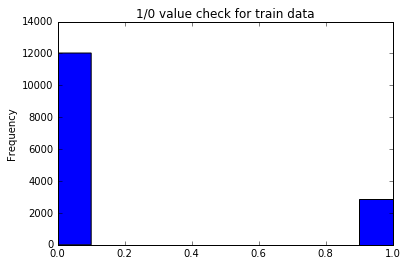

In [106]:
train['editor_award'].plot('hist')
plt.title("1/0 value check for train data")

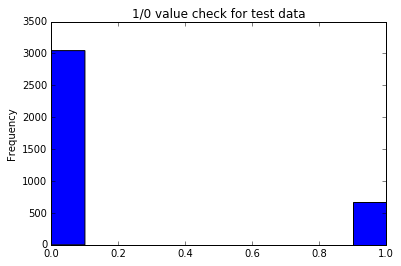

In [107]:
test['editor_award'].plot('hist')
plt.title("1/0 value check for test data")

In [108]:
#ok, both test and train have 1/0 values. We are good to go

In [109]:
# Lets try to see the relative importance of each variable in the whole dataset

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
ensmodel = ExtraTreesClassifier()

In [111]:
ensmodel.fit(df[['score','genre_en','plat_en','release_year','release_month','release_day']], df["editor_award"])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [112]:
print(ensmodel.feature_importances_)

[ 0.69809026  0.05576515  0.05014901  0.07948439  0.04705837  0.06945282]


In [113]:
# Lets build our first logistic model using only score and release year

In [114]:
import statsmodels.api as sm

In [115]:
logit = sm.Logit(train['editor_award'],train[['score','release_year']] )

In [116]:
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.151670
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           editor_award   No. Observations:                14871
Model:                          Logit   Df Residuals:                    14869
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Oct 2016   Pseudo R-squ.:                  0.6891
Time:                        22:16:43   Log-Likelihood:                -2255.5
converged:                       True   LL-Null:                       -7254.5
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
score            4.9944      0.110     45.285      0.000         4.778     5.211
release_year    -0.021

In [117]:
# Also, lets build a model with all factors
logit = sm.Logit(train['editor_award'],train[['score','genre_en','plat_en','release_year','release_month','release_day']] )
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.145626
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           editor_award   No. Observations:                14871
Model:                          Logit   Df Residuals:                    14865
Method:                           MLE   Df Model:                            5
Date:                Sat, 08 Oct 2016   Pseudo R-squ.:                  0.7015
Time:                        22:16:44   Log-Likelihood:                -2165.6
converged:                       True   LL-Null:                       -7254.5
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
score             5.2407      0.117     44.657      0.000         5.011     5.471
genre_en         -0

In [118]:
# Ok, so going from 2 variable model to 6 variable model our R-squ value changed from 0.6894 to 0.6993

In [119]:
# Lets try and plot each variable univariately and see the results

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
model = LogisticRegression()

In [121]:
def sample_single_col(col_value):
    l1=len(train)
    l2=len(test)
    X_train=train[col_value].reshape(l1,1)
    y_train=train['editor_award'].reshape(l1,1)
    X_test=test[col_value].reshape(l2,1)
    y_test=test['editor_award'].reshape(l2,1)
    return (X_train,y_train, X_test, y_test)

In [122]:
#only socres
col_list=['score','genre_en','plat_en','release_year','release_month','release_day']
for value in col_list:
    X_train,y_train, X_test, y_test=sample_single_col(value)
    m=model.fit(X_train,y_train)
    print ("*******************************")
    print ("Col value =%s"%value)
    print ("Model score = %f"%m.score(X_train,y_train))
    predicted=m.predict(X_test)
    print ("Model accuracy = %f"%metrics.accuracy_score(y_test,predicted))

/usr/lib64/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib64/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib64/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib64/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

*******************************
Col value =score
Model score = 0.920113
Model accuracy = 0.928187
*******************************
Col value =genre_en
Model score = 0.808890
Model accuracy = 0.818989
*******************************
Col value =plat_en
Model score = 0.808890
Model accuracy = 0.818989
*******************************
Col value =release_year
Model score = 0.808890
Model accuracy = 0.818989
*******************************
Col value =release_month
Model score = 0.808890
Model accuracy = 0.818989
*******************************
Col value =release_day
Model score = 0.808890
Model accuracy = 0.818989


/usr/lib64/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib64/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
#Looks like score has the maximum influence on prediction and rest of the factors don't contribute much

In [127]:
def sample_df1(col_values):
    l1=len(train)
    l2=len(test)
    X_train=train[col_values]
    y_train=train['editor_award']
    X_test=test[col_values]
    y_test=test['editor_award']
    return (X_train,y_train, X_test, y_test)

In [128]:
import itertools

In [134]:
col_lst = ['score','genre_en','plat_en','release_year','release_month','release_day']
result=[]
for L in range(0, len(col_list)+1):
    for subset in itertools.combinations(col_list, L):
        l=list(subset)
        if len(l)>1 and 'score' in l:
            rd={}
            X_train,y_train, X_test, y_test=sample_df1(l)
            m=model.fit(X_train,y_train)
            rd["Attributes"]=l
            predicted=m.predict(X_test)
            rd["Model_accu"]=metrics.accuracy_score(y_test,predicted)*100
            result.append(rd)           

In [139]:
newlist = sorted(result, key=lambda k: k['Model_accu'])
for i in newlist:
    print (i)  

{'Model_accu': 93.114577729962349, 'Attributes': ['score', 'genre_en']}
{'Model_accu': 93.302850995158693, 'Attributes': ['score', 'plat_en', 'release_year', 'release_day']}
{'Model_accu': 93.329747175901019, 'Attributes': ['score', 'plat_en', 'release_year']}
{'Model_accu': 93.35664335664336, 'Attributes': ['score', 'genre_en', 'plat_en', 'release_year']}
{'Model_accu': 93.35664335664336, 'Attributes': ['score', 'genre_en', 'plat_en', 'release_year', 'release_day']}
{'Model_accu': 93.437331898870355, 'Attributes': ['score', 'genre_en', 'release_day']}
{'Model_accu': 93.518020441097363, 'Attributes': ['score', 'genre_en', 'plat_en']}
{'Model_accu': 93.544916621839704, 'Attributes': ['score', 'plat_en']}
{'Model_accu': 93.544916621839704, 'Attributes': ['score', 'plat_en', 'release_day']}
{'Model_accu': 93.544916621839704, 'Attributes': ['score', 'genre_en', 'plat_en', 'release_day']}
{'Model_accu': 93.571812802582031, 'Attributes': ['score', 'release_day']}
{'Model_accu': 93.5718128025

In [137]:
## A model with all 6 values gives less accuracy that the combination of score, release_year, day
## So lets build our final model on these 3 paramteres

In [140]:
logit_final = sm.Logit(train['editor_award'],train[['score','release_year','release_day']] )
result = logit_final.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.151648
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:           editor_award   No. Observations:                14871
Model:                          Logit   Df Residuals:                    14868
Method:                           MLE   Df Model:                            2
Date:                Sat, 08 Oct 2016   Pseudo R-squ.:                  0.6891
Time:                        22:27:51   Log-Likelihood:                -2255.2
converged:                       True   LL-Null:                       -7254.5
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
score            4.9937      0.110     45.283      0.000         4.778     5.210
release_year    -0.021

In [200]:
## Our Decision tree model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dtmodel = DecisionTreeClassifier(min_samples_split=100, random_state=99)


In [201]:
X_train,y_train,X_test,y_test=sample_df1(['score','release_year','release_day'])

In [202]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

In [203]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    """ this method is taked from
    http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html"""
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpdf", "dt.dot", "-o", "dt.pdf"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [204]:
visualize_tree(dtmodel, ['score','release_year','release_day'])

In [205]:
predicted = dtmodel.predict(test[['score','release_year','release_day']])

In [206]:
print(metrics.classification_report(test['editor_award'], predicted))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3045
          1       0.89      0.89      0.89       673

avg / total       0.96      0.96      0.96      3718



In [207]:
print((metrics.confusion_matrix(test['editor_award'], predicted)))

[[2974   71]
 [  74  599]]


In [211]:
dtmodel.predict_proba(test[['score','release_year','release_day']])

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [173]:
#And this brings us to the end of our experiment with gaming data